## Import modules

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, copy
from pathlib import Path
from pprint import pprint

%load_ext autoreload
%autoreload 2

THIS_PATH = Path(os.path.abspath(''))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [5, 2.5]
plt.rcParams['figure.autolayout'] = True
mpl.rcParams.update({'axes.grid': True})

In [4]:
from em.signal_utils import gen_ir

toas_gt = np.array([134.221, 143.1, 202.01, 240.9])
gains_gt = np.array([1., .5, .4, .35])
fdflen = 41
ir_gt = gen_ir(int(toas_gt.max()+100), toas_gt, gains_gt, fdflen)
N = ir_gt.shape[0]
print(N)

340


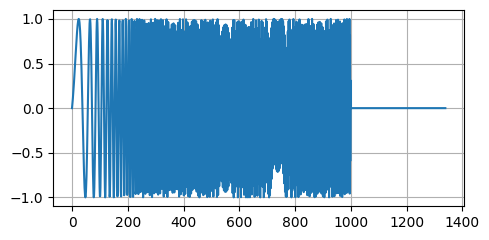

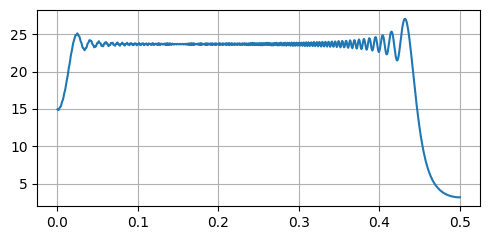

In [14]:
from em.signal_utils import gen_chirp
from numpy.fft import fft, rfft, ifft, irfft, fftfreq, rfftfreq
%matplotlib inline
f0 = 0.5 / 100  # unit is periods per sample. 0.5 is Nyquist frequency
f1 = 0.45
chp_len = 1000
sig_len = chp_len + len(ir_gt)
chp_signal = gen_chirp(f0, f1, chp_len, sig_len)
chp_signal_fft = rfft(chp_signal)
plt.plot(chp_signal)
plt.show()
fftfreqs = rfftfreq(sig_len, 1)
plt.plot(fftfreqs, np.abs(chp_signal_fft))
plt.show()

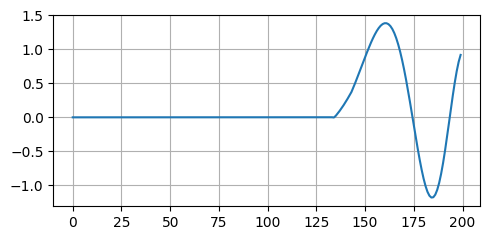

In [18]:
%matplotlib inline
mic_signal = np.convolve(chp_signal, ir_gt, mode='full')[:sig_len]
plt.plot(mic_signal[:200])
plt.show()

## EM

In [55]:
from em.emsc import EMSC, EMSC_Estimate, EMSC_Setup
R = len(toas_gt)
setup = EMSC_Setup(
    num_ref=R,
    max_iter=10,
    return_history=True,
    toa_range=(100, 300),
)
init_est = EMSC_Estimate(
    toas=np.random.uniform(100, 300, R),
    gains=np.random.uniform(0, 1, R),
)
pprint(init_est)

EMSC_Estimate(gains=array([0.50615431, 0.48605636, 0.56156624, 0.82238053]),
              toas=array([218.05995527, 178.96674269, 144.10944618, 170.62572634]))


In [49]:
pprint(toas_gt)

array([134.221, 143.1  , 202.01 , 240.9  ])


In [56]:
final_est, hist = EMSC(chp_signal, mic_signal, setup, init_est)

In [57]:
%matplotlib qt
fig, axs = plt.subplots(2)
axs[0].plot([est.toas for est in hist])
axs[1].plot([est.gains for est in hist])
plt.show()

In [58]:
final_est

EMSC_Estimate(gains=array([0.46780752, 0.46597441, 0.13674157, 0.30777057]), toas=array([134., 134., 144., 143.]))

In [46]:
toas_gt

array([134.221, 143.1  , 202.01 , 240.9  ])